In [4]:
import rasterio as rio
from rasterio.mask import mask
import geopandas as gpd

/tmp/ipykernel_3588852/1404432498.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [5]:
carb_hucs = gpd.read_file('share/outputs/processed_hucs.shp')

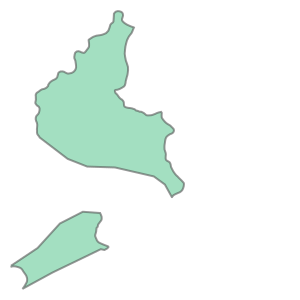

In [3]:
carb_hucs.iloc[0].geometry

In [6]:
mukey_src = rio.open('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/gNATSGO/FY2024_gNATSGO_mukey_grid.tif')

In [7]:
mukey, out_transform = mask(mukey_src, [carb_hucs.iloc[0].geometry], crop=True)

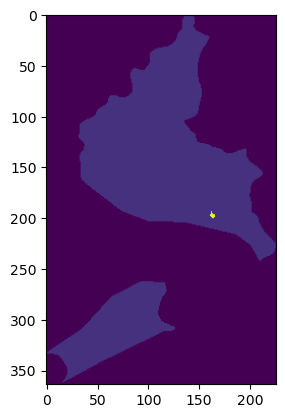

In [8]:
import matplotlib.pyplot as plt

plt.imshow(mukey[0])

In [9]:
import numpy as np
huc_mukeys = np.unique(mukey)
huc_mukeys = huc_mukeys[huc_mukeys>0]

In [8]:
huc_mukeys

array([ 422095,  422100,  422101,  422103,  422104,  422105,  422106,
        422107,  422108,  422110,  422114,  422115,  422117,  422118,
        422119,  422120,  422121,  422122,  422123,  422125,  422128,
        422129,  422130,  422131,  422132,  422134,  422136,  422137,
        422138,  422139,  422140,  422141,  422142,  422145,  422150,
        422151,  422153,  422154,  422155,  422156,  422158,  422159,
        422160,  422161,  422162,  422163,  422164,  422165,  422166,
        422172,  422176,  422178,  422180,  422183,  422184,  422185,
        422186,  422187,  422188,  422189,  422190,  422191,  422192,
        422193,  422194,  422195,  422196,  422197,  422198,  422199,
        422200,  422201,  422202,  422203,  422205,  422206,  422207,
        422208,  422209,  422210, 3000299], dtype=int32)

In [1]:
import pandas as pd

In [3]:
component_table = pd.read_csv('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/gNATSGO/gNATSGO_CONUS_component.csv')

/tmp/ipykernel_3588852/3191409358.py:1: DtypeWarning: Columns (18,54,55,72,73,97,100,101,102,103,106,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  component_table = pd.read_csv('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/gNATSGO/gNATSGO_CONUS_component.csv')


In [2]:
horizon_table = pd.read_csv('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/gNATSGO/gNATSGO_CONUS_chorizon.csv')

/tmp/ipykernel_3588852/811658887.py:1: DtypeWarning: Columns (4,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  horizon_table = pd.read_csv('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/gNATSGO/gNATSGO_CONUS_chorizon.csv')


In [ ]:
import dask.dataframe as dd

horizon_table = dd.read_csv('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/gNATSGO/gNATSGO_CONUS_chorizon.csv')

In [10]:
huc_comp = component_table[component_table.mukey.isin(huc_mukeys)]

In [39]:
huc_comp.keys().to_list()

['OBJECTID',
 'comppct_l',
 'comppct_r',
 'comppct_h',
 'compname',
 'compkind',
 'majcompflag',
 'otherph',
 'localphase',
 'slope_l',
 'slope_r',
 'slope_h',
 'slopelenusle_l',
 'slopelenusle_r',
 'slopelenusle_h',
 'runoff',
 'tfact',
 'wei',
 'weg',
 'erocl',
 'earthcovkind1',
 'earthcovkind2',
 'hydricon',
 'hydricrating',
 'drainagecl',
 'elev_l',
 'elev_r',
 'elev_h',
 'aspectccwise',
 'aspectrep',
 'aspectcwise',
 'geomdesc',
 'albedodry_l',
 'albedodry_r',
 'albedodry_h',
 'airtempa_l',
 'airtempa_r',
 'airtempa_h',
 'map_l',
 'map_r',
 'map_h',
 'reannualprecip_l',
 'reannualprecip_r',
 'reannualprecip_h',
 'ffd_l',
 'ffd_r',
 'ffd_h',
 'nirrcapcl',
 'nirrcapscl',
 'nirrcapunit',
 'irrcapcl',
 'irrcapscl',
 'irrcapunit',
 'cropprodindex',
 'constreeshrubgrp',
 'wndbrksuitgrp',
 'rsprod_l',
 'rsprod_r',
 'rsprod_h',
 'foragesuitgrpid',
 'wlgrain',
 'wlgrass',
 'wlherbaceous',
 'wlshrub',
 'wlconiferous',
 'wlhardwood',
 'wlwetplant',
 'wlshallowwat',
 'wlrangeland',
 'wlopenla

In [116]:
huc_comp.cokey.values.astype('float')

array([24434343., 24434344., 24434345., 24434346., 24434347., 24434348.,
       24434182., 24434183., 24434401., 24434402., 24434403., 24434404.,
       24434405., 24434406., 24434407., 24434408., 24434409., 24434410.,
       24434411., 24434412., 24434413., 24434349., 24434350., 24434351.,
       24434352., 24434353., 24434354., 24434355., 24434356., 24434357.,
       24434358., 24434359., 24434360., 24434185., 24434186., 24434188.,
       24434191., 24434192., 24434194., 24434195., 24434196., 24434197.,
       24434198., 24434199., 24434200., 24434201., 24434202., 24434203.,
       24434204., 24434205., 24434206., 24434207., 24434211., 24434213.,
       24434214., 24434215., 24434216., 24434217., 24434218., 24434221.,
       24434224., 24434225., 24434226., 24434227., 24434228., 24434229.,
       24434230., 24434231., 24434232., 24434233., 24434337., 24434338.,
       24434339., 24434340., 24434341., 24434342., 24434234., 24434235.,
       24434318., 24434319., 24434243., 24434244., 

In [11]:
horizon_table.cokey==24629637#[horizon_table.cokey.isin(huc_comp.cokey)]

0           True
1           True
2          False
3          False
4          False
           ...  
3563603    False
3563604    False
3563605    False
3563606    False
3563607    False
Name: cokey, Length: 3563608, dtype: bool

In [12]:
for cokey in huc_comp.cokey.values.astype('float'):
    print(horizon_table[horizon_table.cokey==cokey])

        OBJECTID hzname  desgndisc desgnmaster desgnmasterprime  desgnvert  \
970835    970836    E/B        NaN         E/B              NaN        NaN   
970836    970837    B/E        NaN         B/E              NaN        NaN   
970837    970838     Bt        NaN           B              NaN        NaN   
970838    970839      A        NaN           A              NaN        NaN   
970839    970840      E        NaN           E              NaN        NaN   
970840    970841     Cd        NaN           C              NaN        NaN   
970841    970842     Bs        NaN           B              NaN        NaN   

        hzdept_l  hzdept_r  hzdept_h  hzdepb_l  ...  ph2osoluble_l  \
970835      23.0        33      58.0      43.0  ...            NaN   
970836      43.0        58      71.0      64.0  ...            NaN   
970837      64.0        84      96.0     100.0  ...            NaN   
970838       0.0         0       0.0       3.0  ...            NaN   
970839       3.0        1

In [59]:
huc_cokeys = huc_comp.cokey.values

In [126]:
horizon_table = pd.read_csv('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/gNATSGO/gNATSGO_CONUS_chorizon.csv')

: 

In [94]:
huc_horiz = horizon_table[horizon_table.cokey.isin(fixed_cokeys)]
huc_horiz

,OBJECTID,hzname,desgndisc,desgnmaster,desgnmasterprime,desgnvert,hzdept_l,hzdept_r,hzdept_h,hzdepb_l,...,ph2osoluble_l,ph2osoluble_r,ph2osoluble_h,ptotal_l,ptotal_r,ptotal_h,excavdifcl,excavdifms,cokey,chkey
0,1,C,NaN,C,NaN,2.0,NaN,20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24629637.0,73203533.0
1,2,A,NaN,A,NaN,1.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24629637.0,73203532.0
2,3,C1...C5,NaN,C,NaN,2.0,NaN,20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24630059.0,73204462.0
3,4,Ap,NaN,A,NaN,1.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24630059.0,73204461.0
4,5,Bt,NaN,B,NaN,2.0,NaN,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24630061.0,73204464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63159,63160,C,NaN,C,NaN,NaN,40.0,102,142.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24013365.0,71401725.0
63160,63161,Ap,NaN,A,NaN,NaN,0.0,0,0.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24013365.0,71401724.0
63161,63162,Bk,NaN,B,NaN,NaN,15.0,18,25.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24013365.0,71401726.0
63162,63163,Bw,NaN,B,NaN,NaN,15.0,18,23.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24013366.0,71401728.0


In [91]:
horizon_table.cokey

0        24629637.0
1        24629637.0
2        24630059.0
3        24630059.0
4        24630061.0
            ...    
63160    24013365.0
63161    24013365.0
63162    24013366.0
63163    24013366.0
63164           NaN
Name: cokey, Length: 63165, dtype: float64

[24629854,
 24629855,
 24629637,
 24629638,
 24629639,
 24630059,
 24630060,
 24630061,
 24630062,
 24630063,
 24630064,
 24630065,
 24630066,
 24630067,
 24630068,
 24630847,
 24630848,
 24630849,
 24630850,
 24631034,
 24631035,
 24631036,
 24631037,
 24631038,
 24629601,
 24629602,
 24629603,
 24629604,
 24630069,
 24630070,
 24629640,
 24629641,
 24630037,
 24630038,
 24630039,
 24629942,
 24629943,
 24629944,
 24629945,
 24629946,
 24629856,
 24629857,
 24629858,
 24629642,
 24629643,
 24629644,
 24629645,
 24629859,
 24629860,
 24629826,
 24629827,
 24629828,
 24629829,
 24629646,
 24629647,
 24629648,
 24629649,
 24630841,
 24630842,
 24630843,
 24630844,
 24630845,
 24630846,
 24630579,
 24630580,
 24630581,
 24630582,
 24630744,
 24630745,
 24630746,
 24630747,
 24630748,
 24630944,
 24630945,
 24630946,
 24630947,
 24630948,
 24630261,
 24630262,
 24630263,
 24630264,
 24630265,
 24630266,
 24630267,
 24630268,
 24630269,
 24630270,
 24630271,
 24630272,
 24629605,
 24629606,

In [92]:
horizon_table[horizon_table.cokey==fixed_cokeys[1]]

,OBJECTID,hzname,desgndisc,desgnmaster,desgnmasterprime,desgnvert,hzdept_l,hzdept_r,hzdept_h,hzdepb_l,...,ph2osoluble_l,ph2osoluble_r,ph2osoluble_h,ptotal_l,ptotal_r,ptotal_h,excavdifcl,excavdifms,cokey,chkey


In [62]:
huc_cokeys

array(['24434343', '24434344', '24434345', '24434346', '24434347',
       '24434348', '24434182', '24434183', '24434401', '24434402',
       '24434403', '24434404', '24434405', '24434406', '24434407',
       '24434408', '24434409', '24434410', '24434411', '24434412',
       '24434413', '24434349', '24434350', '24434351', '24434352',
       '24434353', '24434354', '24434355', '24434356', '24434357',
       '24434358', '24434359', '24434360', '24434185', '24434186',
       '24434188', '24434191', '24434192', '24434194', '24434195',
       '24434196', '24434197', '24434198', '24434199', '24434200',
       '24434201', '24434202', '24434203', '24434204', '24434205',
       '24434206', '24434207', '24434211', '24434213', '24434214',
       '24434215', '24434216', '24434217', '24434218', '24434221',
       '24434224', '24434225', '24434226', '24434227', '24434228',
       '24434229', '24434230', '24434231', '24434232', '24434233',
       '24434337', '24434338', '24434339', '24434340', '244343

In [63]:
horizon_table[horizon_table.cokey == 24629637]

,OBJECTID,hzname,desgndisc,desgnmaster,desgnmasterprime,desgnvert,hzdept_l,hzdept_r,hzdept_h,hzdepb_l,...,ph2osoluble_l,ph2osoluble_r,ph2osoluble_h,ptotal_l,ptotal_r,ptotal_h,excavdifcl,excavdifms,cokey,chkey
0,1,C,NaN,C,NaN,2.0,NaN,20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24629637.0,73203533.0
1,2,A,NaN,A,NaN,1.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24629637.0,73203532.0


In [73]:
component_table[component_table.cokey=='24629637']

,OBJECTID,comppct_l,comppct_r,comppct_h,compname,compkind,majcompflag,otherph,localphase,slope_l,...,flsoilleachpot,flsoirunoffpot,fltemik2use,fltriumph2use,indraingrp,innitrateleachi,misoimgmtgrp,vasoimgtgrp,mukey,cokey
2,3,NaN,30.0,NaN,Menahga,Series,Yes,LOW PPT,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398853,24629637


In [72]:
component_table.cokey

False

In [87]:
fixed_cokeys = []
for i, cokey in enumerate(component_table.cokey):
    cokey_split = cokey.split(':')
    #print(cokey_split)
    if len(cokey_split) == 1:
        cokey_int = int(cokey_split[0])
    elif len(cokey_split) == 2:
        cokey_int = int(cokey_split[1])
    else:
        #print("wtf? cokey =",cokey)
        cokey_int = 0
    fixed_cokeys.append(cokey_int)

In [88]:
fixed_cokeys

[24629854,
 24629855,
 24629637,
 24629638,
 24629639,
 24630059,
 24630060,
 24630061,
 24630062,
 24630063,
 24630064,
 24630065,
 24630066,
 24630067,
 24630068,
 24630847,
 24630848,
 24630849,
 24630850,
 24631034,
 24631035,
 24631036,
 24631037,
 24631038,
 24629601,
 24629602,
 24629603,
 24629604,
 24630069,
 24630070,
 24629640,
 24629641,
 24630037,
 24630038,
 24630039,
 24629942,
 24629943,
 24629944,
 24629945,
 24629946,
 24629856,
 24629857,
 24629858,
 24629642,
 24629643,
 24629644,
 24629645,
 24629859,
 24629860,
 24629826,
 24629827,
 24629828,
 24629829,
 24629646,
 24629647,
 24629648,
 24629649,
 24630841,
 24630842,
 24630843,
 24630844,
 24630845,
 24630846,
 24630579,
 24630580,
 24630581,
 24630582,
 24630744,
 24630745,
 24630746,
 24630747,
 24630748,
 24630944,
 24630945,
 24630946,
 24630947,
 24630948,
 24630261,
 24630262,
 24630263,
 24630264,
 24630265,
 24630266,
 24630267,
 24630268,
 24630269,
 24630270,
 24630271,
 24630272,
 24629605,
 24629606,

In [1]:
import rasterio as rio
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rasterstats import zonal_stats
import seaborn as sns
from scipy.stats import spearmanr, pearsonr

raster_key = pd.read_excel('raster-data-key.xlsx', index_col=0)

p_karst_df = gpd.read_file('share/analysis-layers/processed_hucs.shp')
# Raster data is in EPSG:4326
p_karst_df_4326 = p_karst_df.to_crs("4326")

In [2]:
parameter='carbonate'
raster_dir = raster_key['dir'][parameter]
raster_filename = raster_key['filename'][parameter]
full_raster_path = os.path.join(raster_dir, raster_filename)
scale = raster_key['scale'][parameter]
offset = raster_key['offset'][parameter]

In [3]:
src = rio.open('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/gNATSGO/UC-Davis-agg/caco3_kg_sq_m.tif')
#src = rio.open('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/chelsa_v2/envicloud/chelsa/chelsa_V2/GLOBAL/climatologies/1981-2010/bio/CHELSA_cmi_mean_1981-2010_V.2.1.tif')

In [32]:
src.bounds

BoundingBox(left=-2356800.0, bottom=276800.0, right=2258400.0, top=3172800.0)

In [35]:
p_karst_df.crs

<Derived Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
affine = src.transform
array = src.read(1)

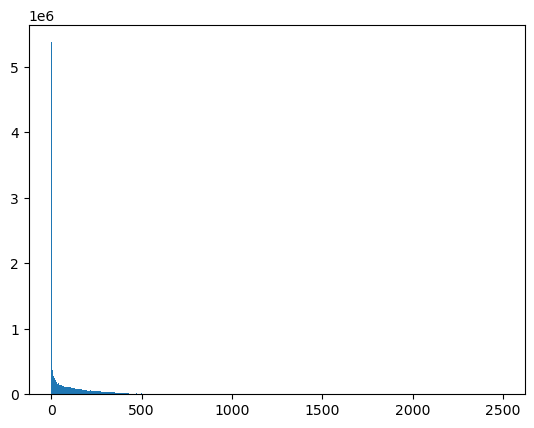

In [55]:
plt.hist(array[array!=-9999].ravel(), bins=500);

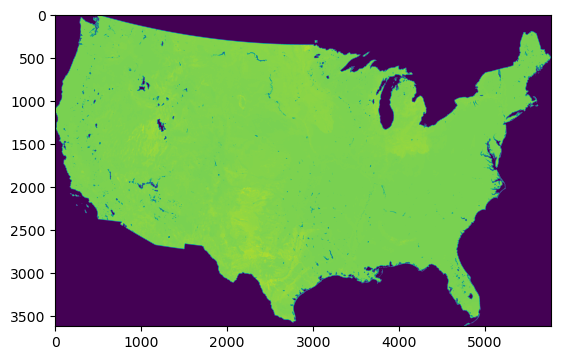

In [38]:
plt.imshow(array)

In [10]:
df_zonal_stats2 = pd.DataFrame(zonal_stats(p_karst_df, array, affine=affine, all_touched=True))

/home/mcoving/anaconda3/envs/geo_env/lib/python3.11/site-packages/rasterstats/io.py:328: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [14]:
src.nodatavals

(-9999.0,)

In [5]:
df_zonal_stats = pd.DataFrame(zonal_stats(p_karst_df, array, affine=affine, all_touched=True, nodata=-9999))

In [13]:
diff = df_zonal_stats2['mean'] - df_zonal_stats['mean']
diff[diff!=0]

55       -61.729031
151     -104.886315
200      -68.738351
280     -250.682026
282     -250.931663
            ...    
28960   -135.208568
29003    -81.635538
29022    -61.722519
29027    -66.369919
29033   -381.151061
Name: mean, Length: 535, dtype: float64

In [9]:
df_zonal_stats

,min,max,mean,count
0,0.000000,0.000000,0.000000,3
1,147.583725,326.381378,222.069051,6
2,0.000000,21.796793,2.720950,66
3,0.000000,6.872828,0.527049,82
4,0.000000,0.000000,0.000000,3
...,...,...,...,...
29063,0.000000,494.134521,214.309482,132
29064,22.201174,340.807739,204.008925,72
29065,6.109346,436.164703,55.415638,32
29066,1.874165,275.831512,49.477063,29


In [41]:
p_karst_df.iloc[0]

objectid                                                   12.0
tnmid                    {6505F355-D2F5-4F5B-B23D-28B9D65EDB67}
metasource                                                 None
sourcedata                                                 None
sourceorig                                                 None
sourcefeat                                                 None
loaddate                                2013/01/18 07:08:11.000
referenceg                                                 None
areaacres                                               58843.6
areasqkm                                                 238.13
states                                                       GA
huc12                                              030701040804
name                              Gregeory Creek-Ocmulgee River
hutype                                                        S
humod                                                        NM
tohuc                                   

<AxesSubplot: >

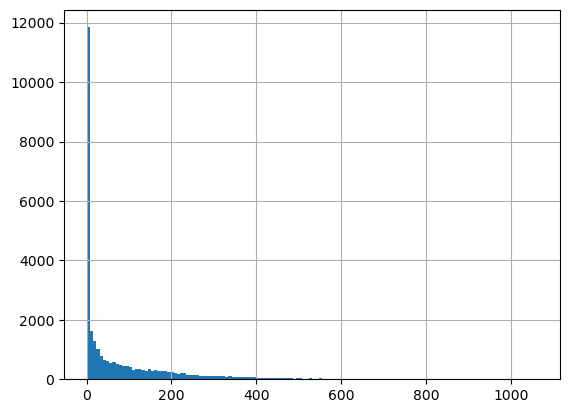

In [45]:
df_zonal_stats['mean'].hist(bins=140)

In [27]:
p_karst_df.crs

<Derived Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich